
<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">On the role of neurogenesis in overcoming catastrophic forgetting</div>

## Plan: 


1. [Definitions](#sec1)
2. [Introduction](#sec2)
2. [Self Organizing networks](#sec3)
4. [Criterias for the plasticity](#sec4)
5. [How to classify more complex data:](#sec5)
6. [Comparison of a dynamically grown and a static network](#sec6)
7. [Conclusion](#sec7)
8. [Sources](#sec8)

# <a id="sec1"></a> 1. Definitions:

A few technical terms need to be defined in order to fully understand the matter:<br><br>

- **plasticity**: <br> <p>
 (*biology*) the adaptability of an organism to changes in its environments. Neuroplasticity refers to the ability of the brain to change continuously throughout an individual's life. We can easily understand what it refers to in Deep Learning.
<br><br>

- **stability**: <br> <p> (*of a neural network*) the ability to keep a stable classification accuracy of the function it had previously learned while being trained on other ones. 
<br><br>

<img align="right" img src="im1.png" width="400" title='catastrophic forgetting'>
    
- **catastrophic forgetting**: <br> <p>
(or *catastrophic interference*) the tendency of a neural network to 'forget' previously learned information upon learning new information. 
As an example, if a classification model being trained is shifted to a different set of objects, it will proceed to forget the original set due to a representation shift. 
<br> Let's say you would like to train a neural network in order to recognize a specific object on a large dataset of images. If you first train the neural network with images where the object is seen on a close range, from the side, and then on a set where it is seen from above, and from far away, it will proceed to forget the information it learned with the first set. This raises issues, for instance, when carrying out unsupervised learning on videos.
<br> This issue can be seen as a _stability-plasticity_ dilemma. On the one side, when a neural network is being trained on very different elements, we would like it to have a good plasticity, that would allow it to quickly learn the new elements, but on the other side, it would be perfect for the network to have a good stability, and therefore remember well the items seen long ago.    <br><br>
    


- **neurogenesis**: <br> <p>
(*biology*): the process by which neurons are formed in the brain.<br>
(*neural network*):  the ability to create or delete neurons. Neurons of this kind are *dynamically grown*. <br><br>
    




# 2. <a id="sec2"></a> Introduction:
<br><br>
This notebook was made for exploring how the use of neurogenesis might mitigate, or even overcome catastrophic forgetting. <br>
The first part will focus on an introduction of self-organizing networks, along with some very straightforward implementation of it. You will then find a description of neurogenesis, and how giving neural networks the capacity to grow new neurons might help. 
<br><br>
Finally, you'll also find a comparison of the performances of a static and a growing network.

However, we can imagine that giving a neural network the opportunity to create new neurons might give it a technical advantage as it could get many more neurons than the static one. Hence, the number of neurons of the dynamically grown networks will be bounded by the one of the static neural networks throughout this notebook.<br><br>

<br><br> 
# 3. <a id="sec3"></a>Self Organizing Networks

### 1 - Description
**Self Organizing Networks** are neural networks based on the topographical organization of the brain. Unlike those trained with backpropagation, self organizing networks are unsupervized. The neurons concerning the same type of information are therefore wired, or located in a similar spatial location. This is based on observations of the brain. For instance, neurons in the visual cortex activates when a bar of light is seen at a specific angle. Neurons that respond to similar bars are located next to each other in the visual cortex. Hence, there is no error feedback, or no supervision in the training of these networks.<br><br>   <img src="visual_cortex.png" width="350" title='visual cortex'>  <br><br>


### 2 - Training
The network is composed of a set of neurons, $A$, each neuron consisting of a weight vector $w_j \in \mathbb{R}^{n}$.<br> A self-organized neural network would therefore look the following way:
<br><br>   <img src='im3.png' width="400" title='self-organized neural network'>
<br><br>
Training the network is done in a very simple way:

Given an input $x(t) \in \mathbb{R}^{n}$: <br>
- We compute the distance $d_j$ of each neuron to the input. That is to say the distance between the weight vector of the neuron and the weight vector. $d_{j} = \alpha_{0} \lVert x (t) - w_{j}\lVert^{2}$, with $\lVert\lVert$ as the euclidian norm.
- We compute the 'best-matching unit' or BMU: $b = argmin(d_{j}, j \in A)$
- We then update the weights of the neurons that are connected to the BMU, with, for $i\in \{b,n\}$, $n$ being the neighbors neurons of the BMU: $\Delta w_{i} = \epsilon_{i}h_{i}(x(t)-w_{i})$, with $h_i \in [0,1]$ being an 'habituation counter', that is to say an indicator of how frequently the neuron has fired. For each neuron $i$, $h_i = 1$ at the beginning of the training. 
- The habituation counter of the BMU and its neighboring neurons decreases iteratively towards 0: $\Delta h_{i} = \tau_{i}\kappa(1-h_{i}) - \tau_{i}$, with $i\in \{b,n\}$, or: $h{i}(t+1) = \frac{h{i}(t)}{\tau}$

<br><br>
Using this technique, the network will map from the input space to an usually lower dimensional map field. Hence, once the BMU (the node that best matches the input) is found, its weights vector is moved in the dimensional space towards that of the input. Hence, perceptions that look like each other end up close to each other (resembling the neuronal organization in the brain). <br><br>
On the figure below, the blue cloud is the distribution of the training data. The weights are primarily randomly chosen, positionning the neurons arbitrarily in the data space. When a new input is given (white point), the BMU is, along with some of its neighbors, moved closer to the input's position. Iterations after iterations, the neural network (or grid) tends to approximate the distribution.
<br><br>   <img src='im5.png' width="800" title='training process of a self-organizing neural network, projected in 2D'>
<br><br>


<img align="right" img src='im4.gif' width="200" title='animated training process of a self-organizing neural network, projected in 2D'>
Let's dive into an useful application of thos networks. Imagine that you would like to classify datapoints according to the three clusters on the image on the right. You could train such a network in order to map the distribution, you can afterward add an output layer, and create connections between the hidden and output layers so that the net produces the same output if any nodes in a particular neighborhood is activated, that is to say when the distance between its weights and the input is the shortest. 
<br><br>


### 3 - A straightforward example

Let's say that we whould like to classify some information on a very simple case, in order to better grasp what is happening there. <br><br>

\begin{equation*}
data = 
\begin{pmatrix}
1 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0  & 1  & 0 & 0  \\
0 & 0 & 1 & 1 
\end{pmatrix}
\end{equation*}
<br><br>
The rows represent some measures we have made, and we would like to categorize those in two clusters. We might imagine that the first and third raws will be in the same clusters, and the second and third ones also.<br><br>


Our neural network will look like the following (with two *output* cells in order to get two classes):

<br><br>   <img src='im2.png' width="400" title='simple self-organized neural network'>
<br><br>



We will keep, for all $i \in \mathbb{N}$, $h_{i}(t+1) = \frac{h_{i}(t)}{2}$ and $\epsilon_i = 0.6$, and randomly initialize the weight matrix to: <br> <br>
\begin{equation*}
W = 
\begin{pmatrix}
0.2 & 0.8 \\
0.6 & 0.4 \\
0.5 & 0.7 \\
0.9 & 0.3
\end{pmatrix}
\end{equation*}

Let's compute the distance for the first vector, $(1,1,0,0)$: <br><br>
We get: 
\begin{equation*}
d_1 = (0.2-1)^2 + (0.6-1)^2 + (0.5-0)^2 + (0.9-0)^2 = 1.86
\end{equation*}
\begin{equation*}
d_2 = (0.8-1)^2 + (0.4-1)^2 + (0.7-0)^2 + (0.3-0)^2 = 0.98
\end{equation*}

Hence, the first vector is closer to the output node 2, we can therefore update the weights of this node using:
\begin{equation*}
w_i{}(t+1)=w_{i}(t)+0.6(x –w_{i}(t))
\end{equation*}
<br>Therefore, we get: 
\begin{equation*}
W = 
\begin{pmatrix}
0.2 & 0.92 \\
0.6 & 0.76 \\
0.5 & 0.28 \\
0.9 & 0.12
\end{pmatrix}
\end{equation*}
<br>We repeat those operations for the other vectors in order to complete a first cycle of learning.



By repeating those cycle a hundred times, we get:
 
\begin{equation*}
W_{100} = 
\begin{pmatrix}
6e-17 & 1 \\
2e-16 & 0.49 \\
0.51 & 2e-16 \\
1 & 1e-16
\end{pmatrix}
\end{equation*}

And the matrix keeps converging towards:
\begin{equation*}
W_{inf} = 
\begin{pmatrix}
0 & 1 \\
0 & 0.5 \\
0.5 & 0\\
1 & 0
\end{pmatrix}
\end{equation*}
<br><br>
The first column being the average of the vectors in the first cluster, and the second being the average of the ones in the second. Hence, if we compute the distance of each vector to its cluster we get:
\begin{equation*}
d_{cluster 1} = (0)^2 + (0.5)^2 + (0)^2 + (0)^2 = 1.25
\end{equation*}
And to the other cluster:
\begin{equation*}
d_{cluster 2} \geq (1)^2 + (0.5)^2 + (1)^2  = 1.25
\end{equation*}

Therefore, those vectors have been classified, and we could now classify other vectors by computing their distance to the weight matrix.

### 4 - Intuition

Let's try to grasp what happened there:
- The network adapted its weights so that the neurons corresponding to the different clusters have weights corresponding to the inputs that correspond to those clusters.
- This reminds us of what we had seen about the visual cortex: neurons that correspond to the same category of inputs, or the same clusters, get activated at the same time, and are linked by weights: they are located in a similar spatial location.


### 5.  Simulation:
Let's classify vectors the same way it was done in the examples.

In [29]:
import numpy as np

#### training data creation:
Our training matrix will be a block diagonal matrix:

\begin{equation*}
data = 
\begin{pmatrix}
(...) & 0 & 0 & 0 \\
0 & (...) & 0 & 0 \\
0  & 0  & (...) & 0  \\
0 & 0 & 0 & (...) 
\end{pmatrix}
\end{equation*}

Each class being composed of the lines corresponding to one block.



In [30]:
def create_dataset(classes, size_data, length_data, verbose = False):
    """
    Creates a block diagonal matrix composed with:
    - classes blocks
    - length_data rows
    - size_data columns
    """
    data = []
    for c in range(classes):
        for k in range(length_data//classes):
            line = [0 for l in range(size_data)]
            for i in range(size_data//classes * c, size_data//classes * (c + 1)):
                u = np.random.uniform(9,10)
                line[i] = np.random.uniform(u+1,u + 2)
                #line[i] = 1
            data.append(line)
        if(verbose):
            print('class',c+1,'sample line: ', line)
    for j in range(length_data%classes):
        line = [0 for l in range(size_data)]
        for i in range(size_data//classes * (classes-1), size_data//classes * (classes)):
            u = np.random.uniform(9,10)
            line[i] = np.random.uniform(u+1,u + 2)
        data.append(line)
    return data

In [31]:
classes = 6
size_data = 12
length_data = 500
nb_active_neurons = 2
max_output_neurons = 8

data = create_dataset(classes,size_data, length_data, True)

class 1 sample line:  [11.139625978373571, 11.087818286183559, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
class 2 sample line:  [0, 0, 11.391507643351073, 10.847913702801877, 0, 0, 0, 0, 0, 0, 0, 0]
class 3 sample line:  [0, 0, 0, 0, 10.997386833015872, 11.142281477037152, 0, 0, 0, 0, 0, 0]
class 4 sample line:  [0, 0, 0, 0, 0, 0, 11.439073746646336, 10.905364376929091, 0, 0, 0, 0]
class 5 sample line:  [0, 0, 0, 0, 0, 0, 0, 0, 11.085466506841271, 11.253021664943649, 0, 0]
class 6 sample line:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10.906170680046094, 11.140639783242548]


#### static self-organizing network
It will consist in:
- *size_data* input cells
- *max_output_neurons* output cells

In [32]:
def distance(inp, W, nb_active_neurons):
    """
    Returns an array with the distance between the input and the weights of each one of the 'output layer' neurons
    """    
    return [sum(np.square(inp - W[j])) for j in range(nb_active_neurons)]


def train_cycle_static(inp,W_static):
    """
    For a static network W:
    Finds the BMU correponding to the input
    updates W and h accordingly
    """
    bmu = np.argmin(distance(inp, W_static, max_output_neurons))
    W_static[bmu] += h_static[bmu] * epsilon_static[bmu] * (inp - W_static[bmu])
    h_static[bmu] = h_static[bmu] * (1 - tau * kappa) + tau * (kappa - 1)

    
def train_network_static(data, W):
    """
    For a static network W:
    Trains the network on data
    """
    for i in range(len(data)):
        train_cycle_static(np.array(data[i]),W_static)
    print('final h :\n', h_static, '\n\n')

In [33]:
tau = 0 # To complete
kappa = 0 # To complete

W_static = np.random.rand(max_output_neurons, size_data)
epsilon_static = np.array([0.6 for j in range(max_output_neurons)])
h_static = np.array([1. for j in range(max_output_neurons)])

train_network_static(data, W_static)

final h :
 [1. 1. 1. 1. 1. 1. 1. 1.] 




<div class="alert alert-success">
    
**Exercise 1:**<br>
Modify $\tau$ and $\kappa$ in order to get a network that has as many output neurons as classes (the number that was chosen when the dataset was created).
</div>

<div class="alert alert-warning">
    
**Hint:**<br>

    
- 'final h' shows you the h of each output neuron at the end of the training. Hence, if the network had learnt only four classes, there should only be four h very close to 0 (very trazined neurons). the other ones should be closer to 1.
</div>

In [36]:
# %load solutions/code1.py

As we can see above, with the right $\tau$ and $\kappa$, the self-organizing network learned how many classes there are without being told before (only some output neurons were trained throughough the process). <br><br>

TEST: Let's generate some new data and test the accuracy of the network on it:

In [37]:
def most_frequent(List): 
    """
    Finds the most frequent item in an array
    """
    counter = 0
    num = List[0] 
      
    for i in List: 
        curr_frequency = List.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 
    return num 

length_data_test = 500


def test_network(W_static, length_data_test, nb_neurons, verbose = False):
    """
    Prints the neurons that was activated for a specific class and the precision of the predictions on this class
    """
    data_test = create_dataset(classes,size_data,length_data_test)
    y_pred = []
    for c in range(classes):
        pred_c = []
        for j in range(length_data_test//classes):
            pred_c.append(np.argmin(distance(data_test[(length_data_test//classes) * c + j], W_static, nb_neurons)))
        y_pred.append(pred_c)
    for k in range(len(y_pred)):
        m = most_frequent(y_pred[k])
        if(verbose):
            print('the ', k, 'th class has activated neuron number ', m ,' with a precision of ', y_pred[k].count(m)/len(y_pred[k]) )

In [38]:
test_network(W_static, 500, max_output_neurons, True)

the  0 th class has activated neuron number  1  with a precision of  1.0
the  1 th class has activated neuron number  4  with a precision of  1.0
the  2 th class has activated neuron number  6  with a precision of  1.0
the  3 th class has activated neuron number  7  with a precision of  1.0
the  4 th class has activated neuron number  2  with a precision of  1.0
the  5 th class has activated neuron number  3  with a precision of  1.0


Hence, for this pretty simple classification task, the self organized neural network has performed very well. Here, each neuron corresponds to one class, and the predictions are made with a very good accuracy.

# 4. <a id="sec4"></a>Criterias for the plasticity:


Neurogenesis in neural networks creates a structural plasticity, giving the network the ability to modify its architecture in order to learn new patterns, instead of relying on the sole modification of weights that previously learned other pattern. This might mitigate the disruptive interference of existing internal representations when learing from novel sensory observations. We will now introduce criterias in order to find out how and when to add a neuron to the network:
- We will first determine two thresholds: $a_{T}$ and $h_{T}$
- At each iteration, we will compute the activity of the network as: $a(t) = exp(-d_{b})$ right after having found the best matching unit. The highest possible activity is therefore 1, when $d_b = 0$ and the network perfectly matches the input. 
- After each iterations, a new neuron will be created whenever the activity of the network will be below $a_{T}$, and the habituation counter of the BMU $h_{b}$ will be below $h_{T}$. The first condition will ensure that a neuron will only be created when none of the existing neurons really matches the new input (it will allow us to get neurons matching this kind of inputs without having to modify the previous ones). The second contition will ensure that the already existing neurons have already been trained before new ones are added.

The newly created neurons are fully connected, and have an habituation counter of $h=1$, and are created halfway between the BMU and the input.

This set of rules will allow the network to add neurons, and the network will be initialized with two neurons (outputs), which is the minimum for required for the discriminative ability (we need at least two classes or clusters).


#### self-organized network with plasticity:
Our initial growing self-organized neural network will consist in:
- size_data input cells
- two output cells

Some room will be left in the weights matrix in order to create new neurons if needed.

In [39]:
def train_cycle_growing(inp,W, nb_active_neurons):
    """
    For a growing network W:
    Finds the BMU correponding to the input
    updates W and h accordingly
    """
    bmu = np.argmin(distance(inp, W, nb_active_neurons))
    activity = np.exp(-np.min(distance(inp, W, max_output_neurons)))
    if(h[bmu] < hT and activity < aT and nb_active_neurons < max_output_neurons and np.all(h[:nb_active_neurons] != 1)):
        # and np.all(h[:nb_active_neurons] <= 0.01)
        W[nb_active_neurons] = (W[bmu] + inp)/2
        nb_active_neurons += 1
    else:
        W[bmu] += h[bmu] * epsilon[bmu] * (inp - W[bmu])
        h[bmu] = 0.95*h[bmu]
    return nb_active_neurons



def train_network_growing(W,data,verbose = False):
    """
    For a growing network W:
    trains the network on data
    """
    nb = 2
    for i in range(len(data)):
        nb = train_cycle_growing(np.array(data[i]),W, nb)
    if(verbose):
        print(nb - 2,' new neuron were added to the network \n')
        print('h: \n', h, '\n\n')
        print('W: \n', W)

In [40]:
aT = 0. # to complete
hT = 0. # to complete

W = np.random.rand(2, size_data)
W = np.r_[W, np.zeros((max_output_neurons - 2, size_data))]

epsilon = np.array([0.6 for j in range(max_output_neurons)])
h = np.array([1. for j in range(max_output_neurons)])

print('randomly initialized weights matrix, with only two active output neurons: \n\n', W)

randomly initialized weights matrix, with only two active output neurons: 

 [[0.20464522 0.05678949 0.37820554 0.64874506 0.57788832 0.88380827
  0.45009433 0.82943197 0.90156238 0.5111009  0.97858232 0.44279177]
 [0.71407642 0.66021234 0.80873545 0.30307321 0.105711   0.42193515
  0.58016514 0.91926184 0.45254547 0.07520512 0.00443385 0.81917291]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.

In [41]:
train_network_growing(W,data,True)

0  new neuron were added to the network 

h: 
 [1.41598691e-02 5.13740028e-10 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00] 


W: 
 [[1.05393512e-07 2.92469262e-08 1.10789806e+01 1.09758684e+01
  2.97615946e-07 4.55166553e-07 2.31801273e-07 4.27162431e-07
  4.64310024e-07 2.63220024e-07 5.03975753e-07 2.28040415e-07]
 [9.31002559e+00 9.16531616e+00 3.51287536e-07 1.31644831e-07
  1.69516381e+00 1.69210986e+00 2.60768370e-02 2.58880380e-02
  3.68585688e-04 3.69599200e-04 5.29306048e-06 5.59233808e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000

<div class="alert alert-success">
    
**Exercise 2:**<br>
Find the right thresholds $a_T$ and $h_T$ so that the networks ends up with as many neurons as there are classes.
</div>

<div class="alert alert-warning">
    
**Hints:**<br>

- The networks begins with 2 output neurons. hence, $classes - 2$ neurons should be added during the training phase.

</div>

In [52]:
# %load solutions/code2.py

In [53]:
test_network(W, 500, max_output_neurons, True)

the  0 th class has activated neuron number  0  with a precision of  1.0
the  1 th class has activated neuron number  1  with a precision of  1.0
the  2 th class has activated neuron number  2  with a precision of  1.0
the  3 th class has activated neuron number  3  with a precision of  1.0
the  4 th class has activated neuron number  4  with a precision of  1.0
the  5 th class has activated neuron number  5  with a precision of  1.0


Hence, the growing neural network, having grown neurons in order to classify the different classes, reached a very good precision for each class as well. 

<div class="alert alert-block alert-info"> 
    
**NB:** When you classify more complex data, the network might grow more neurons than the number of classes you would like. However, if you want to use this network for classification, you can still consider each neuron activation as a subclass of the initial cluster you wanted. Hence, you could consider that inputs that activate a specific set of neurons belong to one cluster, the inputs that activate another specific set of neuron belong to another cluster, etc.

# 5. <a id="sec5"></a> How to classify more complex data:

### Adding Context Description
Given that the input might be a temporal function (frames of a video, for instance), we might also like the neural network to take the context into account, that is to say to use the the context of the previous event in the computation of the distance. Each neuron will now consist of a weight vector $w_j \in \mathbb{R}^{n}$ and a number K of context descriptors $c_{j,k}\in \mathbb{R}^{n}$. 
The global context of the network, $C_{k} \in  \mathbb{R}^{n}$, will be computed as follow:

\begin{equation*}
C_{k}(t) = \beta w_{b}^{t-1} + (1-\beta)c_{b,k}^{t-1}
\end{equation*}
<br>Which is a is a linear combination of the context descriptors and the weights of the best macthing units at $t-1$. 
<br><br>
The distance will now be computed the following way:
\begin{equation*}
d_{j} = \alpha_{0} \lVert x (t) - w_{j}\lVert^{2} + \sum_{k=1}^{K}{\lVert C_{k}(t) - c_{j,k}^{t}\lVert^{2}}
\end{equation*}

This is a way to take the context of the previous timestep in the determination of the future weights. The best matching unit would then be the one that have the weights the closest to the input, while having a context that matches best the global context.


The context descriptors of the best matching unit would be updated at the same time and in the same way as its weights: <br><br>
\begin{equation*}
\Delta c_{i,k} = \epsilon_{i}h_{i}(C_{k}(t)-c_{i,k}),h_i \in [0,1] 
\end{equation*}

### The GDM library
from https://github.com/giparisi/GDM, and https://github.com/giparisi/gwr-tb. <br>
It can provide you with most of the tools needed for self-growing neural networks, and some examples in order to help you getting familiar with it. Here is an example of how it works on the iris dataset: 
<br><br>

In [56]:
from GDM_master.gammagwr import GammaGWR
import GDM_master.gtls as gtls
import matplotlib.pyplot as plt
import numpy as np

ds_iris = gtls.IrisDataset(file='./GDM_master/iris.csv', normalize=True)
print("%s from %s loaded." % (ds_iris.name, ds_iris.file)) 

ds_pulsar = gtls.PulsarDataset(file='./GDM_master/pulsar_stars.csv', normalize=True)
print("%s from %s loaded." % (ds_pulsar.name, ds_pulsar.file)) 

IRIS from ./GDM_master/iris.csv loaded.
PULSAR from ./GDM_master/pulsar_stars.csv loaded.


#### Step 1: Initialize

GammaGWR: Growing When Required Network with temporal context

In [57]:
#iris ou pulsar ?
iris = 0;

taux = 0.7


if(iris == 1):
    ds = gtls.IrisDataset(file='./GDM_master/iris.csv', normalize=True)
    
    t = int(taux*len(ds.labels))
    ds_train = gtls.IrisDataset(file='./GDM_master/iris.csv', normalize=True)
    ds_train.labels = ds_train.labels[:t]
    ds_train.vectors = ds_train.vectors[:t]

    ds_test = gtls.IrisDataset(file='./GDM_master/iris.csv', normalize=True)
    ds_test.labels = ds_test.labels[t:]
    ds_test.vectors = ds_test.vectors[t:]
    
else:
    ds = gtls.PulsarDataset(file='./GDM_master/pulsar_stars.csv', normalize=True)
    
    t = int(taux*len(ds.labels))
    ds_train = gtls.PulsarDataset(file='./GDM_master/pulsar_stars.csv', normalize=True)
    ds_train.labels = ds_train.labels[:t]
    ds_train.vectors = ds_train.vectors[:t]

    ds_test = gtls.PulsarDataset(file='./GDM_master/pulsar_stars.csv', normalize=True)
    ds_test.labels = ds_test.labels[t:]
    ds_test.vectors = ds_test.vectors[t:]




In [58]:
g = GammaGWR()
g.init_network(ds,1)

Randomly initialized weights: 

[0.44531805 0.21012744 0.25972779 0.04565378 0.00821588 0.05153149
 0.36325211 0.13306857]
[0.50562503 0.25723198 0.21206492 0.03209882 0.00416601 0.06201393
 0.45881273 0.18221784]


#### Step 2: Parametrize
Choose the number of context descriptors, the nulber of epochs, the thresholds you wants to use, as well as the learning rates:

In [59]:
num_context = 1 # number of context descriptors
epochs = 1 # epochs per sample for incremental learning
a_threshold = [0.95, 0.9]
beta = 0.7
learning_rates = [0.2, 0.001]
context = True

g.train_ggwr(ds_train, epochs, a_threshold[0], beta, learning_rates)

(Epoch: 1, NN: 1252, ATQE: 0.054223434653424385)
(-- Added  1250 neuron(s) (total added - total deleted)
(-- Removed 656 neuron(s))


### Step 3: Test

You can get the accuracy on your training set, as well as plot the spatial organization of your neural network (in 2D). For each input, the classification correspond to the color of the neuron activated.

test accuracy:  0.9867783985102421 

you can also plot the spatial representation of the neural network in two dimensions: 


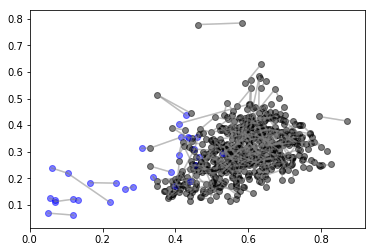

In [60]:
g.test_gammagwr(ds_test, test_accuracy=True)
print('test accuracy: ',g.test_accuracy, '\n')
print('you can also plot the spatial representation of the neural network in two dimensions: ')
gtls.plot_network(g, True, True) 

# 6. <a id="sec6"></a> Comparison of a dynamically grown and a static network

gdm_demo_no_neurogenesis.py corresponds to a static network, while gdm_demo.py corresponds to a dynamic network, with the maximum number of neurons being equal to the static's one.

In [61]:
run GDM_master/gdm_demo_no_neurogenesis.py

IRIS from iris.csv loaded.
(Epoch: 1, NN: 30, ATQE: 0.09873118529377498)
(Epoch: 1, NN: 30, ATQE: 0.05949469699143556)
(Epoch: 1, NN: 30, ATQE: 0.20486375131460655)
(Epoch: 1, NN: 30, ATQE: 0.07090032924287167)
(Epoch: 1, NN: 30, ATQE: 0.10877387356548533)
(Epoch: 1, NN: 30, ATQE: 0.07947152445000895)
(Epoch: 1, NN: 30, ATQE: 0.12449254440461952)
(Epoch: 1, NN: 30, ATQE: 0.08562081765930638)
(Epoch: 1, NN: 30, ATQE: 0.120520958764572)
(Epoch: 1, NN: 30, ATQE: 0.07750884136655031)
(Epoch: 1, NN: 30, ATQE: 0.5763658824403568)
(Epoch: 1, NN: 30, ATQE: 0.10718450267790654)
(Epoch: 1, NN: 30, ATQE: 0.4972876766412499)
(Epoch: 1, NN: 30, ATQE: 0.13073813385995314)
(Epoch: 1, NN: 30, ATQE: 0.5109939677639186)
(Epoch: 1, NN: 30, ATQE: 0.16960980236929143)
(Epoch: 1, NN: 30, ATQE: 0.42977164885295116)
(Epoch: 1, NN: 30, ATQE: 0.1997811254843711)
(Epoch: 1, NN: 30, ATQE: 0.3425423347079026)
(Epoch: 1, NN: 30, ATQE: 0.22356493024783908)
(Epoch: 1, NN: 30, ATQE: 0.6656813652196004)
(Epoch: 1, NN: 

In [62]:
run GDM_master/gdm_demo.py

IRIS from iris.csv loaded.
(Epoch: 1, NN: 3, ATQE: 0.11883550955400879)
(Epoch: 1, NN: 2, ATQE: 0.11534645740675378)
(Epoch: 1, NN: 4, ATQE: 0.17329093375151952)
(Epoch: 1, NN: 2, ATQE: 0.22083144127678606)
(Epoch: 1, NN: 6, ATQE: 0.07195013980964265)
(Epoch: 1, NN: 2, ATQE: 0.2185494372820073)
(Epoch: 1, NN: 9, ATQE: 0.07776138070651302)
(Epoch: 1, NN: 2, ATQE: 0.21119831924195515)
(Epoch: 1, NN: 11, ATQE: 0.06799538057618562)
(Epoch: 1, NN: 2, ATQE: 0.2237438105121481)
(Epoch: 1, NN: 12, ATQE: 0.45914951167840706)
(Epoch: 1, NN: 3, ATQE: 0.3852657135044016)
(Epoch: 1, NN: 13, ATQE: 0.21250860796993237)
(Epoch: 1, NN: 3, ATQE: 0.3538660321145711)
(Epoch: 1, NN: 15, ATQE: 0.1476361456659508)
(Epoch: 1, NN: 3, ATQE: 0.4408997544336498)
(Epoch: 1, NN: 17, ATQE: 0.1336694040222312)
(Epoch: 1, NN: 3, ATQE: 0.3937402093026719)
(Epoch: 1, NN: 17, ATQE: 0.07844967159677999)
(Epoch: 1, NN: 3, ATQE: 0.3792586127873371)
(Epoch: 1, NN: 18, ATQE: 0.2308950942075511)
(Epoch: 1, NN: 4, ATQE: 0.58874

Hence, the accuracies from the self-growing network (0.81, 0.59) look far better, compared to the ones of the static network (0.66, 0.33), after only one epoch, with a maximum number of neurons of 20.

# Catastrophic forgetting:

Let's try to find out wether neurogenesis helps overcoming catastrophic forgetting. To do so, I will compare a growing self-organising neural network to a static one, the number of neurons of the growing one being bounded by the static one. The tests will be performed on the MNIST dataset, seen previously. 

### Adding a pre-trained network in front of it:
You might wonder, given the relatively simple example we have used before, how to use this kind of networks in order to classify images. <br>
Let's say that you would like to use $28$x$28$ RGB images, belonging to $10$ classes. Giving this growing neural network the pixels of those images as inputs would obviously be a disaster, given thesize of the dataset and the simplicity of the network, and you therefore need to extract features from those images before feeding those to the network. <br> <br>
To do so, we will use a pre-trained network, already trained on the MNIST dataset. We will get rid of its last two layers. The ouptut of this network will therefore be the output of the fully-connected hidden layer, that is to say 512 features, that will feed our self-organizing neural network.

<br><br>
Hence, this neural network will be fed with features coming out of the hidden layer of the pre-trained network, instead of the images themselves. Furthermore, in order to observe catastrophic forgetting, both the static and the growing neural network will be fed with the training data per label. (The images corresponding to the 1s first, then the 2s, etc). After each training, we will test the networks on each label (the 1s, then the 2s, etc), in order to observe the performance of both.


In [63]:
#from GDM_master.gammagwr import GammaGWR
#import GDM_master.gtls as gtls
#import matplotlib.pyplot as plt
#import numpy as np
#import GDM_master.gdm_own as gown

#from keras.models import Sequential
#from keras.layers import Dense, Activation
#import keras.metrics as metrics
#import keras.losses as losses
#import keras.optimizers as optimizers
#import matplotlib.pyplot as plt
from keras.models import load_model
from keras.utils import np_utils
from keras.models import Model

Using TensorFlow backend.


#### 1. Let's load the MNIST data

In [66]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [67]:
print("Number of images for training: {}".format(X_train.shape[0]))
print("Image size: {}".format(X_train.shape[1:]))
print("Number of images for testing: {}".format(X_test.shape[0]))

X_train = X_train.reshape(X_train.shape[0], 784)
X_test  = X_test.reshape(X_test.shape[0], 784);
print(X_train.shape)
print(X_test.shape)
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Number of images for training: 60000
Image size: (28, 28)
Number of images for testing: 10000
(60000, 784)
(10000, 784)


#### 2. Let's sort the data

In order to experience catastrophic forgetting, we need to train the network on each task at a time (recognizing the 1s, then the 2s, etc)

In [68]:
labels = range(1,10)

def tri_dataset(X, y):
    X_train_classes = [[] for i in labels]
    for j in range(len(y)):
        X_train_classes[y[j]-1].append(X[j])
    return X_train_classes

In [69]:
X_train_classes = np.array(tri_dataset(X_train, y_train))
X_test_classes = np.array(tri_dataset(X_test, y_test))

#### 3. Let's load the pre-trained model, without its last two layers
You can find the preparation of this pre-trained model in the other_notebooks/Cutting the mnist model.ipynb notebook

In [70]:
model_popped = load_model('model_popped.h5')
for layer in model_popped._layers:
    layer.trainable = False

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


/Users/axel/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


#### 3. Let's process the dataset 
We will:
- extract the features by feeding the data to the pre-trained network we loaded earlier
- take the outputs, and create the training and testing datasets for our growing and static neural networks from the GDM library.

In [72]:
# Getting the features, that is to say the output of the pre-trained NN:

X_train_GWR = []
for i in X_train_classes:
    X_train_GWR.append(model_popped.predict(np.array(i))) 
X_train_GWR = np.array(X_train_GWR)


X_test_GWR = []
for i in X_test_classes:
    X_test_GWR.append(model_popped.predict(np.array(i)))
X_test_GWR = np.array(X_test_GWR)

In [89]:
ds_train_list = []
ds_test_list = []
for j in range(9):
    ds_train_list.append(gtls.OwnDataset(X_train_GWR[j][:150], np.array([j+1 for k in range(300)]), 10,normalize=True))
    ds_train_list.append(gtls.OwnDataset(X_train_GWR[j][150:300], np.array([j+1 for k in range(300)]), 10,normalize=True))
    ds_test_list.append(gtls.OwnDataset(X_test_GWR[j][:300], np.array([j+1 for k in range(300)]), 10,normalize=True))

In [90]:
g = GammaGWR()
g.init_network(ds_train_list[0],1)

Randomly initialized weights: 

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.06789449
 0.         0.         0.         0.         0.5227611  0.
 0.         0.         0.         0.         0.         0.33835524
 0.         0.70082057 0.         0.         0.         0.
 0.7443207  0.         0.         0.         0.         0.
 0.         0.         0.         0.32488915 0.         0.
 0.         0.         0.         0.7191296  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01120395 0.         0.         0.
 0.         0.         0.35440788 0.4799536  0.         0.
 0.         0.         0.         0.69444895 0.34569007 0.07330354
 0.         0.         0.         0.         0.         0.


#### 3. Parametrize the model: 

In [103]:
num_context = 1 # number of context descriptors
epochs = 1 # epochs per sample for incremental learning
a_threshold = [0.95, 0.9]
beta = 0.7
learning_rates = [0.2, 0.001]
context = True

accuracies = []

for j in range(2):
    print('training on label', j+1)
    g.train_egwr(ds_train_list[j].vectors,ds_train_list[j].labels.reshape(-1,1), epochs, a_threshold[0], beta, learning_rates,True,True)
    accuracy = []
    for k in range(2):
        g.test_egwr(ds_test_list[k], test_accuracy=True)
        accuracy.append(g.test_accuracy)
        print(g.test_accuracy, 'accuracy on label', k+1)
    accuracies.append(accuracy)

In [81]:
len(ds_train_list[0].labels)

300

In [92]:
accuracies = []
for j in range(len(ds_train_list)):# 9
    print('training on label', j+1)
    g.train_ggwr(ds_train_list[j], epochs, a_threshold[0], beta, learning_rates)
    accuracy = []
    for k in range(9):
        g.test_gammagwr(ds_test_list[k], test_accuracy=True)
        accuracy.append(g.test_accuracy)
        print(g.test_accuracy, 'accuracy on label', k)
    accuracies.append(accuracy)

training on label 1
(Epoch: 1, NN: 40, ATQE: 2.4921541805595884)
(-- Added  38 neuron(s) (total added - total deleted)
(-- Removed 0 neuron(s))
1.0 accuracy on label 0
0.0 accuracy on label 1
0.0 accuracy on label 2
0.0 accuracy on label 3
0.0 accuracy on label 4
0.0 accuracy on label 5
0.0 accuracy on label 6
0.0 accuracy on label 7
0.0 accuracy on label 8
training on label 2
(Epoch: 1, NN: 78, ATQE: 2.120416896195521)
(-- Added  76 neuron(s) (total added - total deleted)
(-- Removed 0 neuron(s))
1.0 accuracy on label 0
0.0 accuracy on label 1
0.0 accuracy on label 2
0.0 accuracy on label 3
0.0 accuracy on label 4
0.0 accuracy on label 5
0.0 accuracy on label 6
0.0 accuracy on label 7
0.0 accuracy on label 8
training on label 3
(Epoch: 1, NN: 117, ATQE: 3.099781516430791)
(-- Added  115 neuron(s) (total added - total deleted)
(-- Removed 0 neuron(s))
0.9766666666666667 accuracy on label 0
1.0 accuracy on label 1
0.0 accuracy on label 2
0.0 accuracy on label 3
0.0 accuracy on label 4
0

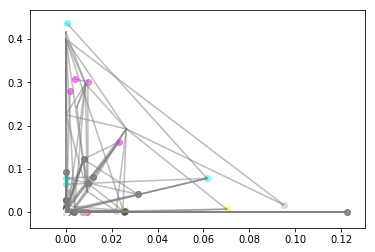

In [94]:
gtls.plot_network(g, True, True) 

Text(0.5, 1.0, 'Accuracy of the GWR network along the training')

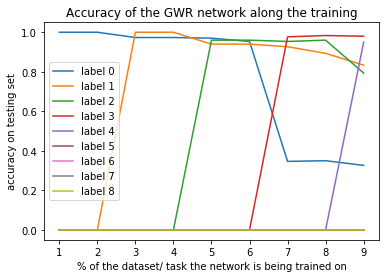

In [48]:
plt.figure()
for j in range(9):
    plt.plot(range(1,10),[accuracies[k][j] for k in range(9)], label = 'label '+ str(j))
#plt.plot(range(9),[accuracies[k][0] for k in range(9)], label = 'label '+ str(j))    
plt.xlabel('% of the dataset/ task the network is being trained on')
plt.ylabel('accuracy on testing set')
plt.legend()
plt.title('Accuracy of the GWR network along the training') 

In [101]:
#accuracies

Text(0.5, 1.0, 'Accuracy of the GWR network along the training')

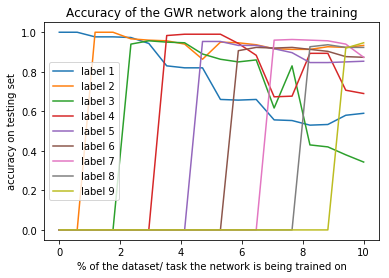

In [95]:
plt.figure()
for j in range(9):#9
    plt.plot(np.linspace(0,10,18),[accuracies[k][j] for k in range(18)], label = 'label '+ str(j+1)) # range(1,10,0.5),
#plt.plot(range(9),[accuracies[k][0] for k in range(9)], label = 'label '+ str(j))    
plt.xlabel('% of the dataset/ task the network is being trained on')
plt.ylabel('accuracy on testing set')
plt.legend()
plt.title('Accuracy of the GWR network along the training') 

In [85]:
from GDM_master.gammagwr_static import GammaGWR_static

from GDM_master.gammagwr import GammaGWR
import GDM_master.gtls as gtls
import matplotlib.pyplot as plt
import numpy as np
import GDM_master.gdm_own as gown

from keras.models import Sequential
from keras.layers import Dense, Activation
import keras.metrics as metrics
import keras.losses as losses
import keras.optimizers as optimizers
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.utils import np_utils
from keras.models import Model


from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Number of images for training: {}".format(X_train.shape[0]))
print("Image size: {}".format(X_train.shape[1:]))
print("Number of images for testing: {}".format(X_test.shape[0]))

X_train = X_train.reshape(X_train.shape[0], 784)
X_test  = X_test.reshape(X_test.shape[0], 784);
print(X_train.shape)
print(X_test.shape)
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)


labels = range(1,10)

def tri_dataset(X, y):
    X_train_classes = [[] for i in labels]
    for j in range(len(y)):
        X_train_classes[y[j]-1].append(X[j])
    return X_train_classes


X_train_classes = np.array(tri_dataset(X_train, y_train))
X_test_classes = np.array(tri_dataset(X_test, y_test))


model_popped = load_model('model_popped.h5')
for layer in model_popped._layers:
    layer.trainable = False

X_train_GWR = []
for i in X_train_classes:
    X_train_GWR.append(model_popped.predict(np.array(i)))
    
X_train_GWR = np.array(X_train_GWR)


X_test_GWR = []
for i in X_test_classes:
    X_test_GWR.append(model_popped.predict(np.array(i)))
    
X_train_GWR = np.array(X_train_GWR)

X_test_GWR = np.array(X_test_GWR)


num_context = 1 # number of context descriptors
epochs = 1 # epochs per sample for incremental learning
a_threshold = [0.95, 0.9]
beta = 0.7
learning_rates = [0.2, 0.001]
context = True


ds_train_list = []
ds_test_list = []
for j in range(9):
    ds_train_list.append(gtls.OwnDataset(X_train_GWR[j][:300], np.array([j+1 for k in range(300)]), 10,normalize=True))
    ds_test_list.append(gtls.OwnDataset(X_test_GWR[j][:300], np.array([j+1 for k in range(300)]), 10,normalize=True))

Number of images for training: 60000
Image size: (28, 28)
Number of images for testing: 10000
(60000, 784)
(10000, 784)


In [96]:
from GDM_master.gammagwr_static import GammaGWR_static
g_static = GammaGWR_static()
g_static.init_network(ds_train_list[0],1)

Randomly initialized weights: 

[0.         0.         0.         0.19556439 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.15660763 0.         0.         0.         0.50642157
 0.         0.         0.         0.57907534 0.09935128 0.
 0.         0.18322952 0.         0.         0.         0.
 0.         0.29854733 0.         0.         0.         0.
 0.6164872  0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.06308083 0.
 0.         0.         0.         0.52493334 0.         0.
 0.         0.         0.         0.         0.         0.
 0.03317296 0.         0.45006743 0.         0.         0.
 0.         0.         0.4903743  0.3527531  0.         0.
 0.         0.         0.         0.2533451  0.         0.3600027
 0.         0.         0.         0.         0.         0.
 0.193989

In [97]:
len(ds_train_list[j].vectors)

150

# split each train to get new points

In [98]:
accuracies_static = []

for j in range(18):#9
    g_static.train_ggwr(ds_train_list[j], epochs, a_threshold[0], beta, learning_rates)
    accuracy = []
    for k in range(9):
        g_static.test_gammagwr(ds_test_list[k], test_accuracy=True)
        accuracy.append(g_static.test_accuracy)
    print(accuracy)
    accuracies_static.append(accuracy)

(Epoch: 1, NN: 400, ATQE: 2.927118356013298)
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(Epoch: 1, NN: 400, ATQE: 2.9871863941800036)
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(Epoch: 1, NN: 400, ATQE: 3.6842373793898204)
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(Epoch: 1, NN: 400, ATQE: 3.342783372590967)
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(Epoch: 1, NN: 400, ATQE: 3.6940637340661002)
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(Epoch: 1, NN: 400, ATQE: 3.2223833048954775)
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(Epoch: 1, NN: 400, ATQE: 3.788155818253044)
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(Epoch: 1, NN: 400, ATQE: 3.244209827341429)
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(Epoch: 1, NN: 400, ATQE: 3.868113711084841)
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(Epoch: 1, NN: 400, ATQE: 3.424135324962207)
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
(Epoch: 1, NN: 400, ATQE: 3.8920466391652)
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.

In [99]:
accuracies_static

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]

Text(0.5, 1.0, '')

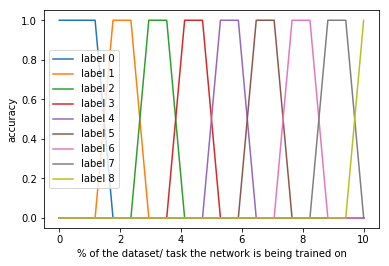

In [100]:
plt.figure()
for j in range(9):
    plt.plot(np.linspace(0,10,18),[accuracies_static[k][j] for k in range(18)], label = 'label '+ str(j))#9 range(1,10),
#plt.plot(range(9),[accuracies[k][0] for k in range(9)], label = 'label '+ str(j))    
plt.xlabel('% of the dataset/ task the network is being trained on')
plt.ylabel('accuracy')
plt.legend()
plt.title('') 

# <a id="sec7"></a> Conclusion

## <a id="sec8"></a> Sources:
The following papers were used in the making of this notebook:
- https://u1093.u-bourgogne.fr/images/stories/labo/pdf/Elisabeth-Thomas/Cours/MVibot/kohonen_no_itvibot.pdf
- https://github.com/giparisi/GDM/blob/master/gdm_demo.py
- https://glowingpython.blogspot.com/2013/09/self-organizing-maps.html
- https://github.com/giparisi/gwr-tb
- https://glowingpython.blogspot.com/2013/09/self-organizing-maps.html
- https://www.sciencedirect.com/science/article/pii/S0893608002000783
- catastrophic forgetting: https://github.com/ariseff/overcoming-catastrophic/blob/master/experiment.ipynb
- neurogenesis catastrophic forgetting https://arxiv.org/pdf/1612.03770.pdf
- https://github.com/ariseff/overcoming-catastrophic